In [54]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy
import csv

In [28]:
with open("email-Eu-core.csv") as infile:
    csv_reader = csv.reader(infile)
    DG = nx.DiGraph(csv_reader)
#print(DG.nodes(data = True))

In [29]:
#print(DG.edges(data = True))

In [30]:
with open("email-Eu-core-department-labels.csv") as infile:
    csv_reader = csv.reader(infile)
    mydict = {rows[0]: {'department': int(rows[1])} for rows in csv_reader}

In [31]:
#print(mydict)

In [32]:
nx.set_node_attributes(DG, mydict)
print(DG.nodes(data = True))

[('0', {'department': 1}), ('1', {'department': 1}), ('2', {'department': 21}), ('3', {'department': 21}), ('4', {'department': 21}), ('5', {'department': 25}), ('6', {'department': 25}), ('7', {'department': 14}), ('8', {'department': 14}), ('9', {'department': 14}), ('10', {'department': 9}), ('11', {'department': 14}), ('12', {'department': 14}), ('13', {'department': 26}), ('14', {'department': 4}), ('15', {'department': 17}), ('16', {'department': 34}), ('17', {'department': 1}), ('18', {'department': 1}), ('19', {'department': 14}), ('20', {'department': 9}), ('21', {'department': 9}), ('22', {'department': 9}), ('23', {'department': 11}), ('24', {'department': 11}), ('25', {'department': 11}), ('26', {'department': 11}), ('27', {'department': 11}), ('28', {'department': 11}), ('29', {'department': 11}), ('30', {'department': 11}), ('31', {'department': 11}), ('32', {'department': 11}), ('33', {'department': 11}), ('34', {'department': 11}), ('35', {'department': 11}), ('36', {'d

In [33]:
nx.write_graphml(DG, "emails_dep.graphml")

In [34]:
DG_only_dep = nx.Graph()
for node in DG.nodes(data = True):
    label, attr_dict = node
    DG_only_dep.add_node(attr_dict["department"])
    
print(nx.info(DG_only_dep))

Name: 
Type: Graph
Number of nodes: 42
Number of edges: 0
Average degree:   0.0000


In [35]:
for edge in DG.edges(data=True):
    #print(edge)
    source, target, edg_attr = edge
    source_dep = mydict[source]['department']
    targ_dep = mydict[target]['department']
    if DG_only_dep.has_edge(source_dep, targ_dep) == False:
        DG_only_dep.add_edge(source_dep, targ_dep, weight = 1)
    else:
        edges = DG_only_dep.edges
        w = edges[source_dep, targ_dep]['weight']
        DG_only_dep.add_edge(source_dep, targ_dep, weight = w+1)
print(nx.info(DG_only_dep))

Name: 
Type: Graph
Number of nodes: 42
Number of edges: 681
Average degree:  32.4286


In [36]:
print(DG_only_dep.edges(data=True))

[(1, 1, {'weight': 539}), (1, 15, {'weight': 104}), (1, 39, {'weight': 54}), (1, 3, {'weight': 18}), (1, 0, {'weight': 54}), (1, 7, {'weight': 103}), (1, 14, {'weight': 52}), (1, 16, {'weight': 5}), (1, 31, {'weight': 42}), (1, 20, {'weight': 4}), (1, 25, {'weight': 38}), (1, 19, {'weight': 5}), (1, 36, {'weight': 237}), (1, 21, {'weight': 25}), (1, 26, {'weight': 32}), (1, 4, {'weight': 129}), (1, 34, {'weight': 73}), (1, 37, {'weight': 19}), (1, 35, {'weight': 49}), (1, 6, {'weight': 38}), (1, 38, {'weight': 43}), (1, 23, {'weight': 53}), (1, 2, {'weight': 17}), (1, 29, {'weight': 4}), (1, 9, {'weight': 48}), (1, 24, {'weight': 6}), (1, 17, {'weight': 5}), (1, 11, {'weight': 11}), (1, 12, {'weight': 1}), (1, 5, {'weight': 26}), (1, 27, {'weight': 1}), (1, 13, {'weight': 28}), (1, 10, {'weight': 34}), (1, 40, {'weight': 7}), (1, 41, {'weight': 4}), (1, 8, {'weight': 8}), (1, 22, {'weight': 5}), (1, 28, {'weight': 8}), (1, 32, {'weight': 3}), (1, 30, {'weight': 2}), (21, 21, {'weight':

In [37]:
nx.write_graphml(DG_only_dep, "dep_only.graphml")
# TODO: remove self loops and add their weight as attribute of nodes

In [38]:
print(DG['0'])

{'1': {}, '316': {}, '146': {}, '268': {}, '581': {}, '221': {}, '18': {}, '734': {}, '178': {}, '380': {}, '0': {}, '459': {}, '215': {}, '250': {}, '148': {}, '73': {}, '498': {}, '226': {}, '101': {}, '218': {}, '377': {}, '17': {}, '74': {}, '177': {}, '248': {}, '103': {}, '560': {}, '309': {}, '88': {}, '5': {}, '297': {}, '313': {}, '223': {}, '238': {}, '368': {}, '266': {}, '222': {}, '283': {}, '6': {}, '64': {}, '166': {}}


In [39]:
print("density of emails:", str(nx.density(DG)))
print("density of deps:", str(nx.density(DG_only_dep)))

density of emails: 0.025342411448732432
density of deps: 0.7909407665505227


In [40]:
G = DG.to_undirected()  # Undirected version of graph used for the computation of clustering coefficient
nx.average_clustering(G)

0.3993549664221539

In [44]:
central_node = 160

cc_central_node = nx.clustering(G, str(central_node))
betweenness = nx.betweenness_centrality(DG, normalized = False)
print("clustering coefficient:", str(cc_central_node))
print("betweenness of nodes:", str(betweenness))
type(betweenness)

clustering coefficient: 0.09351196494775868
betweenness of nodes: {'0': 1548.732711772583, '1': 0.0, '2': 5850.7025488610425, '3': 1536.6856003944515, '4': 5232.020213445737, '5': 27174.02169102858, '6': 12722.776976944997, '7': 2976.6751760880616, '8': 755.45847187551, '9': 480.9143252228849, '10': 1185.073644948173, '11': 5115.525290375631, '12': 4559.996036798694, '13': 10873.680857997577, '14': 3381.010243515185, '15': 2192.226766772277, '16': 1140.9271440771845, '17': 4840.115652338846, '18': 2294.2477558039745, '19': 4228.629105042066, '20': 3585.665765959523, '21': 12738.096111006318, '22': 89.06728288294357, '23': 2977.717640849257, '24': 1172.1837811519179, '25': 235.98248946056705, '26': 119.69785687742731, '27': 1832.727676076164, '28': 5519.884862107221, '29': 1285.8029855889947, '30': 2187.141178130908, '31': 441.63159145567505, '32': 121.79567320987869, '33': 142.80670385976273, '34': 146.49204694946988, '35': 1669.5858221132892, '36': 228.64239366842392, '37': 241.938892

dict

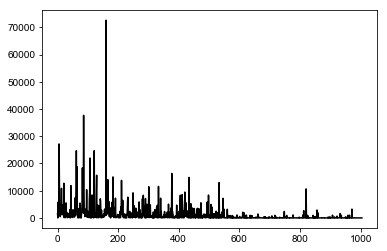

In [64]:
lis = []
for key in betweenness.keys():
    lis.append(betweenness[key])

plt.plot(range(len(lis)), lis)

In [42]:
print("betweenness of departments:", str(nx.betweenness_centrality(DG_only_dep, normalized = False)))

betweenness of departments: {1: 10.190677776183604, 21: 8.357407430021457, 25: 4.638564501090789, 14: 6.467265077770905, 9: 5.283051647582242, 26: 12.021258306764135, 4: 45.23643002445134, 17: 1.9643378536985068, 34: 10.190677776183604, 11: 4.716423836077672, 5: 0.8561535179054752, 10: 10.49740209761381, 36: 18.32401110951694, 37: 8.161065340688815, 7: 6.644448676479272, 22: 3.328023220967801, 8: 6.383421688169675, 15: 16.044671005176838, 3: 0.063894523326572, 29: 0.6350262796043239, 20: 1.4588673768119576, 16: 0.8528909672516203, 38: 8.80646434599494, 27: 0.6541513393699301, 13: 3.6974020976138062, 6: 3.549941731734722, 0: 1.4259789903396434, 28: 2.6135722976192213, 2: 1.3353157916947003, 40: 2.5965002412478912, 35: 6.467265077770905, 23: 1.9350864023289869, 19: 5.33839449247591, 24: 0.2975606909430438, 32: 1.371053756740273, 31: 0.09637605042016806, 39: 0.28983928719703245, 12: 0.1421630874572051, 30: 0.06696428571428571, 41: 0.0, 18: 0.0, 33: 0.0}


[('0', 73), ('1', 52), ('2', 161), ('3', 118), ('4', 163), ('5', 280), ('6', 202), ('7', 116), ('8', 62), ('9', 60), ('10', 75), ('11', 134), ('12', 96), ('13', 233), ('14', 128), ('15', 82), ('16', 115), ('17', 167), ('18', 88), ('19', 120), ('20', 118), ('21', 240), ('22', 27), ('23', 132), ('24', 63), ('25', 50), ('26', 53), ('27', 96), ('28', 174), ('29', 94), ('30', 112), ('31', 82), ('32', 55), ('33', 43), ('34', 49), ('35', 97), ('36', 63), ('37', 54), ('38', 70), ('39', 49), ('40', 101), ('41', 140), ('42', 117), ('43', 19), ('44', 175), ('45', 76), ('46', 117), ('47', 84), ('48', 97), ('49', 23), ('50', 27), ('51', 110), ('52', 42), ('53', 58), ('54', 90), ('55', 71), ('56', 80), ('57', 114), ('58', 218), ('59', 90), ('60', 91), ('61', 118), ('62', 369), ('63', 218), ('64', 249), ('65', 124), ('66', 46), ('67', 15), ('68', 79), ('69', 101), ('70', 28), ('71', 29), ('72', 12), ('73', 54), ('74', 158), ('75', 32), ('76', 37), ('77', 35), ('78', 23), ('79', 70), ('80', 119), ('81

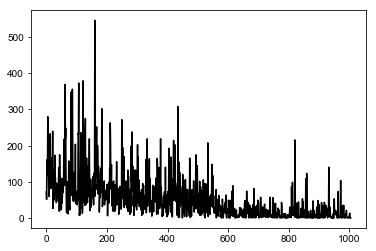

In [69]:
print(nx.degree(DG))
lis2 = []

for x, y in nx.degree(DG):
    lis2.append(y)

plt.plot(range(len(lis2)), lis2)

/Users/claudio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


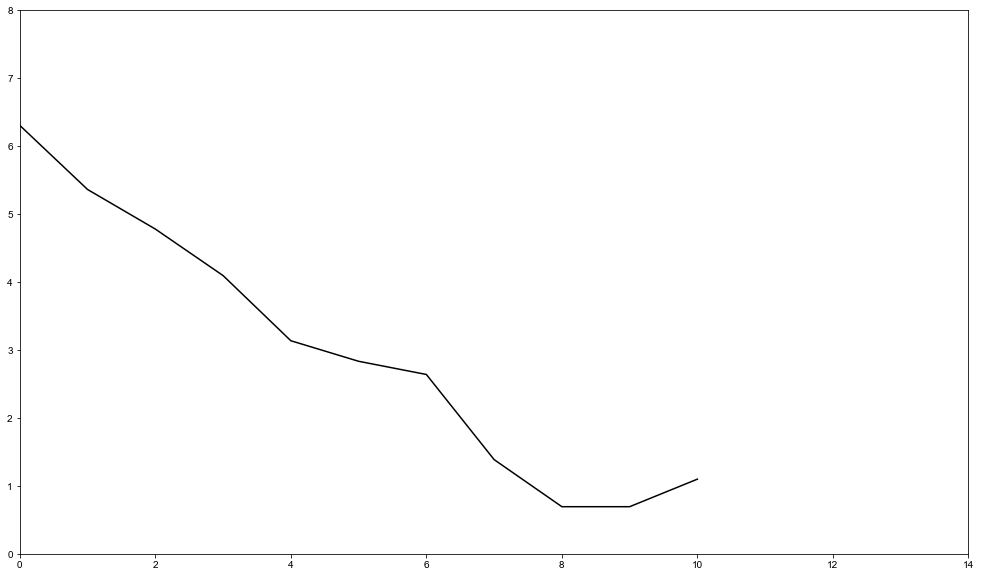

In [110]:
count, _ = np.histogram(lis2, bins=15)
log_count = np.log(count)

plt.figure(1, figsize=(17, 10))

axes = plt.gca()
axes.set_xlim([0, 14])
axes.set_ylim([0, 8])

#plt.plot(count)
plt.plot(log_count)
plt.savefig("log_degree.png")

In [96]:
nx.average_shortest_path_length(DG)

NetworkXError: Graph is not weakly connected.

In [98]:
nx.diameter(DG)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [100]:
nx.radius(DG)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [101]:
nx.eccentricity(DG)

NetworkXError: Found infinite path length because the digraph is not strongly connected